In [71]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [72]:
# Load and view dataset
credit_df = pd.read_csv('../data/credit_risk_dataset.csv')
credit_df.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3993,26,52800,RENT,1.0,PERSONAL,A,4000,NaN,0,0.08,N,3
8057,22,49000,MORTGAGE,6.0,EDUCATION,A,10000,8.00,1,0.20,N,2
14456,23,95000,MORTGAGE,3.0,HOMEIMPROVEMENT,F,15000,17.03,1,0.16,N,2
14207,22,30000,OWN,6.0,VENTURE,A,6000,7.49,0,0.20,N,3
18982,35,117000,RENT,8.0,PERSONAL,A,15000,9.63,0,0.13,N,8


# 1. Pre-processing

In [73]:
# Shape of the dataset
credit_df.shape

(32581, 12)

In [74]:
# Summary statistics
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [75]:
# Check for missing values
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

**Findings/assumptions:** 
- Most `columns` have no `missing values`
- **`person_emp_length`:** `895` missing values, likely represents employment length.
- **`loan_int_rate`:** `3,116` missing values, likely represents loan interest rate.

### Now, let's do a deeper analysis in all columns

In [76]:
# Initialize a list to store results
results = []

# Loop through each column in the original DataFrame
for column_name, column_data in credit_df.items():
    missing_values = column_data.isna().sum()
    zero_values = (column_data == 0).sum() if column_data.dtype in ['int64', 'float64'] else 'N/A'
    negative_values = (column_data < 0).sum() if column_data.dtype in ['int64', 'float64'] else 'N/A'
    
    # Append the results for this column as a dictionary to the list
    results.append({
        'Column Name': column_name, 
        'Missing Values': missing_values, 
        'Zero Values': zero_values, 
        'Negative Values': negative_values
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df

,Column Name,Missing Values,Zero Values,Negative Values
0,person_age,0,0,0
1,person_income,0,0,0
2,person_home_ownership,0,N/A,N/A
3,person_emp_length,895,4105,0
4,loan_intent,0,N/A,N/A
5,loan_grade,0,N/A,N/A
6,loan_amnt,0,0,0
7,loan_int_rate,3116,0,0
8,loan_status,0,25473,0
9,loan_percent_income,0,9,0


### We earlier saw no missing values under `person_income` column. There appear to be `5000` (895 + 4105) rows with zero or nan. 

In [85]:
credit_df[(credit_df['person_income'] > 0) & (credit_df['person_emp_length'].isna() | (credit_df['person_emp_length'] == 0))]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.32,0,0.13,N,3
45,26,300000,MORTGAGE,0.0,EDUCATION,D,25000,15.33,0,0.08,N,3
49,26,89028,RENT,0.0,DEBTCONSOLIDATION,A,30000,6.62,1,0.34,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,RENT,0.0,EDUCATION,E,7000,16.82,1,0.10,Y,24
32564,53,45000,RENT,0.0,PERSONAL,C,5600,13.79,0,0.12,N,28
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19


### Assumptions:
- `NAN` and `zero` values might indicate currently unemployed  

>>> Replace the `NAN` with `0.0` under `person_emp_length` col.

In [65]:
credit_df['person_emp_length'] = credit_df['person_emp_length'].fillna(0.0)
results_df

,Column Name,Missing Values,Zero Values,Negative Values
0,person_age,0,0,0
1,person_income,0,0,0
2,person_home_ownership,0,N/A,N/A
3,person_emp_length,0,5000,0
4,loan_intent,0,N/A,N/A
5,loan_grade,0,N/A,N/A
6,loan_amnt,0,0,0
7,loan_int_rate,3116,0,0
8,loan_status,0,25473,0
9,loan_percent_income,0,9,0


**Assumption:**
- We won't worry about `NAN` values under `loan_int_rate` for now
- `loan_status` values are in `binary format`, hence the high zero values.

In [87]:
credit_df.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [88]:
credit_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Let's see if there are any duplicates in the dataset

In [90]:
# Check duplicates
credit_df.duplicated().sum()

165

### There are `165` duplicates. Let's select the duplicated rows, sort by `person_income`

In [92]:
credit_df.loc[credit_df.duplicated(keep=False), :].sort_values('person_income').head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15952,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0,0.13,N,4
16821,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0,0.13,N,4
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3


### We can drop the duplicates and check the percentage of the dropped rows 

In [93]:
print(f"Percentage of rows to be dropped: {((len(credit_df) - len(credit_df.drop_duplicates())) / len(credit_df)) * 100:.2f}%")

credit_df_cleaned = credit_df.drop_duplicates().reset_index(drop=True)
credit_df_cleaned.head()

Percentage of rows to be dropped: 0.51%


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### `0.51%' is a small percentage, hence dropping is justified.

### Ranking income based on `Central Bureau's Income` (USA) might be helpful. Let's add a column `income_level` to rank individual income.

- `Lower`: less than or equal to $30,000

- `Lower-middle`: $30,001 – $58,020

- `Middle`: $58,021 – $94,000

- `Upper-middle`: $94,001 – $153,000

- `Upper`: greater than $153,000

## 2. Data Exploration and Visualization

In [94]:
# Check min and max income values
credit_df_cleaned['person_income'].max(), credit_df_cleaned['person_income'].min()

(6000000, 4000)

In [97]:
# Create a function to rank income levels
def income_levels_ranking(x):
    if x>=0 and x<=30_000:
        return 'lower'
    if x>30_001 and x<=58_020:
        return 'lower-middle'
    if x>58_021 and x<=94_000:
        return 'middle'
    if x>94_001 and x<=153_000:
        return 'upper-middle'
    if x>153_000:
        return 'upper'

In [98]:
credit_df_cleaned['income_level'] = credit_df_cleaned['person_income'].apply(income_levels_ranking)
credit_df_cleaned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_level
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,middle
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,lower
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,lower
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,middle
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,lower-middle


## Let's see the distribution of income level 

In [99]:
credit_df_cleaned.groupby('income_level')['income_level'].count()

income_level
lower            4486
lower-middle    12751
middle           9869
upper            1097
upper-middle     4213
Name: income_level, dtype: int64

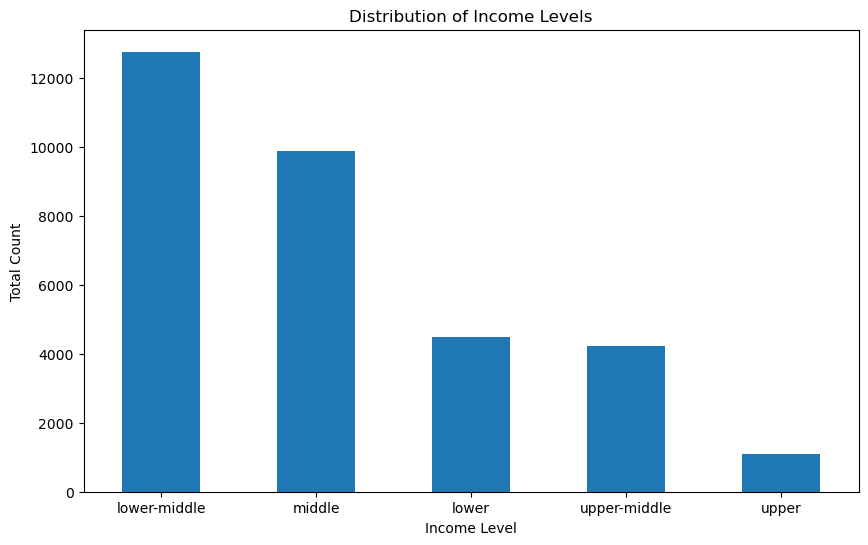

In [101]:
# Plot the distribution of income levels
plt.figure(figsize=(10, 6))
credit_df_cleaned['income_level'].value_counts().plot(kind='bar')
plt.title('Distribution of Income Levels')
plt.ylabel('Total Count')
plt.xlabel('Income Level')
plt.xticks(rotation=0)
plt.show()

### Evidently, we see a pattern where income level distribution tend to be decreasing the higher we go up the ranking

In [102]:
credit_df_cleaned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_level
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,middle
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,lower
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,lower
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,middle
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,lower-middle


### We can further check `loan intent` distribution across `income levels`

In [105]:
# Group by 'loan_intent' and 'income_levels', then count the number of loans in each group
loan_distribution = credit_df_cleaned.groupby(['loan_intent', 'income_level']).size().unstack(fill_value=0)
loan_distribution

income_level,lower,lower-middle,middle,upper,upper-middle
loan_intent,,,,,
DEBTCONSOLIDATION,708,2064,1551,183,683
EDUCATION,888,2565,1987,188,783
HOMEIMPROVEMENT,397,1119,1278,160,640
MEDICAL,980,2632,1648,165,617
PERSONAL,732,2158,1691,194,723
VENTURE,781,2213,1714,207,767


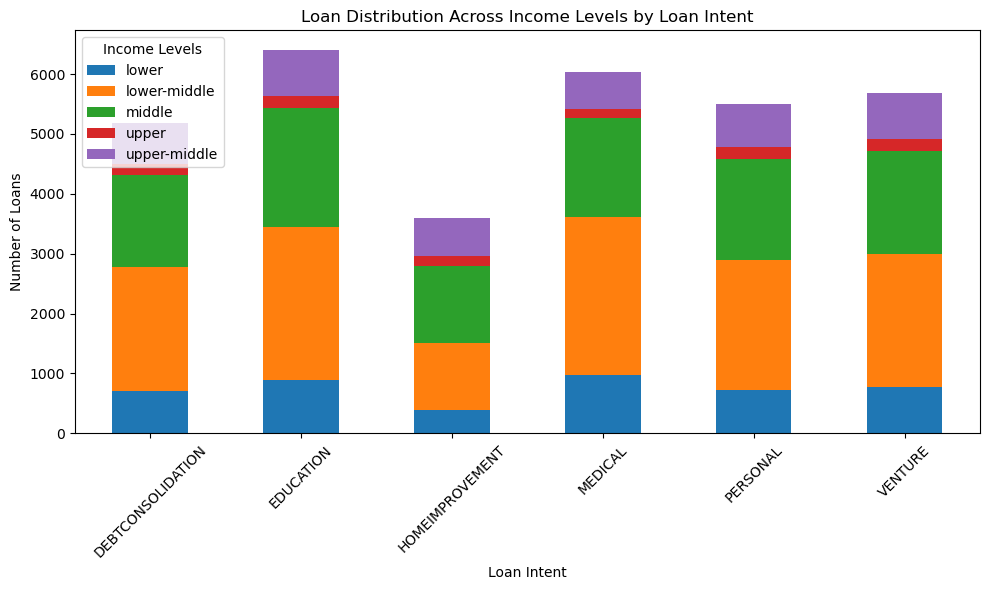

In [106]:
# Plotting
loan_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Distribution Across Income Levels by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Income Levels')
plt.tight_layout()
plt.show()

### **Observations:**
- Most borrowers borrows for education needs.
- Income levels appears to be a direct determinant on number of loans.
>>> The higher the income level, the the higher the loan count observed.


In [107]:
credit_df_cleaned.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_level
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,middle
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,lower
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,lower
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,middle
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,lower-middle


### Does home ownership affect loan amount disbursed?
